In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [31]:
# 1. Load dataset
train_data = pd.read_csv('../data/raw/fraudTrain.csv')
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
print(f"✓ Shape: {train_data.shape[0]:,} rows * {train_data.shape[1]} columns")

✓ Shape: 1,296,675 rows * 23 columns


In [11]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
train_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [14]:
print(train_data.sample(5, random_state=42))

         Unnamed: 0 trans_date_trans_time            cc_num  \
1045211     1045211   2020-03-09 15:09:26      577588686219   
547406       547406   2019-08-22 15:49:01    30376238035123   
110142       110142   2019-03-04 01:34:16  4658490815480264   
1285953     1285953   2020-06-16 20:04:38  3514897282719543   
271705       271705   2019-05-14 05:54:48  6011381817520024   

                                            merchant        category     amt  \
1045211                              fraud_Towne LLC        misc_pos  194.51   
547406                             fraud_Friesen Ltd  health_fitness   52.32   
110142                                fraud_Mohr Inc    shopping_pos    6.53   
1285953                      fraud_Gaylord-Powlowski            home    7.33   
271705   fraud_Christiansen, Goyette and Schamberger   gas_transport   64.29   

           first        last gender                        street  ...  \
1045211    James  Strickland      M            25454 Leonard Lake 

# 3. Data Types and Memory Usage

In [18]:
print("\n3. DATA TYPES & MEMORY USAGE")
print("-" * 80)

print("\n📝 Data Types:")
print(train_data.dtypes)

print("\n💾 Memory Usage:")
print(train_data.memory_usage(deep=True))
print(f"\n💾 Total Memory: {train_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



3. DATA TYPES & MEMORY USAGE
--------------------------------------------------------------------------------

📝 Data Types:
Unnamed: 0                 int64
trans_date_trans_time        str
cc_num                     int64
merchant                     str
category                     str
amt                      float64
first                        str
last                         str
gender                       str
street                       str
city                         str
state                        str
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                          str
dob                          str
trans_num                    str
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

💾 Memory Usage:
Index                          132
Unnamed: 0                10373400
trans_date_tra

# 4. MISSING VALUES ANALYSIS


In [25]:
print("\n4. MISSING VALUES ANALYSIS")
print("-" * 80)

missing = pd.DataFrame({
    'Column': train_data.columns,
    'Missing_Count': train_data.isnull().sum(),
    'Missing_Percentage': (train_data.isnull().sum() / len(train_data)) * 100
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing) > 0:
    print("\n⚠️ Columns with Missing Values:")
    print(missing.to_string(index=False))
else:
    print("\n✓ No missing values found! Dataset is complete.")


4. MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

✓ No missing values found! Dataset is complete.


# 5. DATA DICTIONARY

In [27]:
print("\n5. DATA DICTIONARY")
print("-" * 80)

data_dictionary = {
    'Column': [
        'trans_date_trans_time',
        'cc_num',
        'merchant',
        'category',
        'amt',
        'first',
        'last',
        'gender',
        'street',
        'city',
        'state',
        'zip',
        'lat',
        'long',
        'city_pop',
        'job',
        'dob',
        'trans_num',
        'unix_time',
        'merch_lat',
        'merch_long',
        'is_fraud'
    ],
    'Description': [
        'Date and time of transaction',
        'Credit card number (anonymized)',
        'Merchant name',
        'Transaction category (e.g., grocery, gas)',
        'Transaction amount in USD',
        'Cardholder first name',
        'Cardholder last name',
        'Cardholder gender',
        'Cardholder street address',
        'Cardholder city',
        'Cardholder state',
        'Cardholder ZIP code',
        'Cardholder latitude',
        'Cardholder longitude',
        'Population of cardholder city',
        'Cardholder job/occupation',
        'Cardholder date of birth',
        'Unique transaction number',
        'Unix timestamp of transaction',
        'Merchant latitude',
        'Merchant longitude',
        'Fraud label (1=Fraud, 0=Legitimate)'
    ],
    'Type': [
        'Datetime',
        'Numeric',
        'Categorical',
        'Categorical',
        'Numeric',
        'Categorical',
        'Categorical',
        'Categorical',
        'Categorical',
        'Categorical',
        'Categorical',
        'Numeric',
        'Numeric',
        'Numeric',
        'Numeric',
        'Categorical',
        'Date',
        'Categorical',
        'Numeric',
        'Numeric',
        'Numeric',
        'Binary (Target)'
    ]
}

dd = pd.DataFrame(data_dictionary)
print("\n📚 Data Dictionary:")
print(dd.to_string(index=False))


5. DATA DICTIONARY
--------------------------------------------------------------------------------

📚 Data Dictionary:
               Column                               Description            Type
trans_date_trans_time              Date and time of transaction        Datetime
               cc_num           Credit card number (anonymized)         Numeric
             merchant                             Merchant name     Categorical
             category Transaction category (e.g., grocery, gas)     Categorical
                  amt                 Transaction amount in USD         Numeric
                first                     Cardholder first name     Categorical
                 last                      Cardholder last name     Categorical
               gender                         Cardholder gender     Categorical
               street                 Cardholder street address     Categorical
                 city                           Cardholder city     Categorical

# 6. TARGET VARIABLE ANALYSIS (FRAUD LABEL)

In [29]:
print("\n6. TARGET VARIABLE ANALYSIS - FRAUD DISTRIBUTION")
print("-" * 80)

fraud_counts = train_data['is_fraud'].value_counts()
fraud_pct = train_data['is_fraud'].value_counts(normalize=True) * 100

print("\n🎯 Fraud Label Distribution:")
print(f"   Legitimate (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"   Fraudulent (1): {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")

print(f"\n📊 Fraud Rate: {fraud_pct[1]:.4f}%")
print(f"📊 Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.0f}")


6. TARGET VARIABLE ANALYSIS - FRAUD DISTRIBUTION
--------------------------------------------------------------------------------

🎯 Fraud Label Distribution:
   Legitimate (0): 1,289,169 (99.42%)
   Fraudulent (1): 7,506 (0.58%)

📊 Fraud Rate: 0.5789%
📊 Imbalance Ratio: 1:172


# 8. CLASS IMBALANCE VISUALIZATION


7. VISUALIZING CLASS IMBALANCE
--------------------------------------------------------------------------------


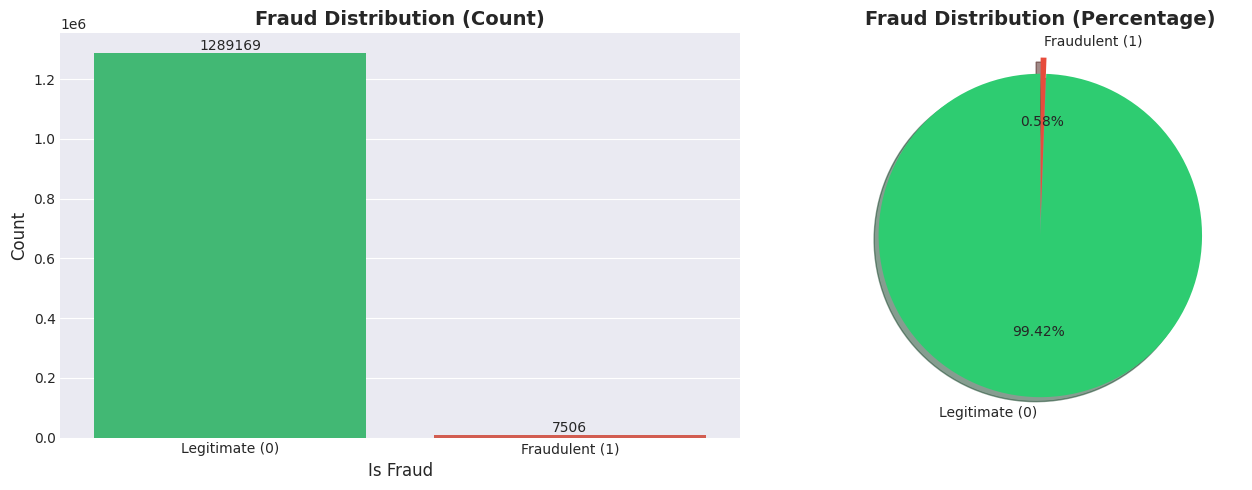

✓ Visualization saved: reports/day1_fraud_distribution.png


In [37]:
print("\n7. VISUALIZING CLASS IMBALANCE")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count Plot
sns.countplot(data=train_data, x='is_fraud', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Fraud Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Is Fraud', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate (0)', 'Fraudulent (1)'])

# Add count labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Percentage Plot
fraud_pct_df = train_data['is_fraud'].value_counts(normalize=True) * 100
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(fraud_pct_df, labels=['Legitimate (0)', 'Fraudulent (1)'], 
            autopct='%1.2f%%', colors=colors, startangle=90,
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Fraud Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/day1_fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved: reports/day1_fraud_distribution.png")

# 8. Initial Fraud Insights

In [38]:
print("\n8. INITIAL FRAUD INSIGHTS")
print("-" * 80)

print("\n🔍 INSIGHT 1: Transaction Amount Analysis")
print("-" * 40)
fraud_amt = train_data[train_data['is_fraud'] == 1]['amt']
legit_amt = train_data[train_data['is_fraud'] == 0]['amt']

print(f"Fraudulent Transactions:")
print(f"   Average Amount: ${fraud_amt.mean():.2f}")
print(f"   Median Amount: ${fraud_amt.median():.2f}")
print(f"   Max Amount: ${fraud_amt.max():.2f}")
print(f"   Min Amount: ${fraud_amt.min():.2f}")

print(f"\nLegitimate Transactions:")
print(f"   Average Amount: ${legit_amt.mean():.2f}")
print(f"   Median Amount: ${legit_amt.median():.2f}")
print(f"   Max Amount: ${legit_amt.max():.2f}")
print(f"   Min Amount: ${legit_amt.min():.2f}")

print("\n🔍 INSIGHT 2: Fraud by Transaction Category")
print("-" * 40)
fraud_by_category = train_data.groupby('category')['is_fraud'].agg(['sum', 'mean', 'count'])
fraud_by_category.columns = ['Fraud_Count', 'Fraud_Rate', 'Total_Transactions']
fraud_by_category['Fraud_Rate'] = fraud_by_category['Fraud_Rate'] * 100
fraud_by_category = fraud_by_category.sort_values('Fraud_Rate', ascending=False)

print(fraud_by_category)

print("\n🔍 INSIGHT 3: Top 10 States by Fraud Count")
print("-" * 40)
fraud_by_state = train_data[train_data['is_fraud'] == 1]['state'].value_counts().head(10)
print(fraud_by_state)

print("\n🔍 INSIGHT 4: Gender Distribution in Fraud")
print("-" * 40)
gender_fraud = train_data.groupby('gender')['is_fraud'].agg(['sum', 'mean', 'count'])
gender_fraud.columns = ['Fraud_Count', 'Fraud_Rate', 'Total_Transactions']
gender_fraud['Fraud_Rate'] = gender_fraud['Fraud_Rate'] * 100
print(gender_fraud)


8. INITIAL FRAUD INSIGHTS
--------------------------------------------------------------------------------

🔍 INSIGHT 1: Transaction Amount Analysis
----------------------------------------
Fraudulent Transactions:
   Average Amount: $531.32
   Median Amount: $396.50
   Max Amount: $1376.04
   Min Amount: $1.06

Legitimate Transactions:
   Average Amount: $67.67
   Median Amount: $47.28
   Max Amount: $28948.90
   Min Amount: $1.00

🔍 INSIGHT 2: Fraud by Transaction Category
----------------------------------------
                Fraud_Count  Fraud_Rate  Total_Transactions
category                                                   
shopping_net           1713        1.76               97543
misc_net                915        1.45               63287
grocery_pos            1743        1.41              123638
shopping_pos            843        0.72              116672
gas_transport           618        0.47              131659
misc_pos                250        0.31               7965

# 9. KEY PERFORMANCE INDICATORS (KPIs)

In [40]:
print("\n9. KEY PERFORMANCE INDICATORS (KPIs)")
print("-" * 80)

total_transactions = len(train_data)
total_fraud = train_data['is_fraud'].sum()
total_legitimate = total_transactions - total_fraud
fraud_rate = (total_fraud / total_transactions) * 100

total_fraud_amount = train_data[train_data['is_fraud'] == 1]['amt'].sum()
total_legit_amount = train_data[train_data['is_fraud'] == 0]['amt'].sum()
total_amount = train_data['amt'].sum()

avg_fraud_amount = train_data[train_data['is_fraud'] == 1]['amt'].mean()
avg_legit_amount = train_data[train_data['is_fraud'] == 0]['amt'].mean()

kpis = {
    'KPI': [
        'Total Transactions',
        'Fraudulent Transactions',
        'Legitimate Transactions',
        'Overall Fraud Rate (%)',
        'Total Transaction Amount',
        'Total Fraud Amount',
        'Total Legitimate Amount',
        'Average Fraud Transaction',
        'Average Legitimate Transaction',
        'Fraud Amount as % of Total',
        'Number of Unique Merchants',
        'Number of Unique Cardholders',
        'Number of Transaction Categories',
        'Date Range'
    ],
    'Value': [
        f"{total_transactions:,}",
        f"{total_fraud:,}",
        f"{total_legitimate:,}",
        f"{fraud_rate:.4f}%",
        f"${total_amount:,.2f}",
        f"${total_fraud_amount:,.2f}",
        f"${total_legit_amount:,.2f}",
        f"${avg_fraud_amount:.2f}",
        f"${avg_legit_amount:.2f}",
        f"{(total_fraud_amount/total_amount)*100:.2f}%",
        f"{train_data['merchant'].nunique():,}",
        f"{train_data['cc_num'].nunique():,}",
        f"{train_data['category'].nunique()}",
        f"{train_data['trans_date_trans_time'].min()} to {train_data['trans_date_trans_time'].max()}"
    ]
}

kpi_df = pd.DataFrame(kpis)
print("\n📊 PROJECT KPIs:")
print(kpi_df.to_string(index=False))


9. KEY PERFORMANCE INDICATORS (KPIs)
--------------------------------------------------------------------------------

📊 PROJECT KPIs:
                             KPI                                      Value
              Total Transactions                                  1,296,675
         Fraudulent Transactions                                      7,506
         Legitimate Transactions                                  1,289,169
          Overall Fraud Rate (%)                                    0.5789%
        Total Transaction Amount                             $91,222,428.90
              Total Fraud Amount                              $3,988,088.61
         Total Legitimate Amount                             $87,234,340.29
       Average Fraud Transaction                                    $531.32
  Average Legitimate Transaction                                     $67.67
      Fraud Amount as % of Total                                      4.37%
      Number of Unique Merch

# 10. HIGH-RISK TRANSACTION INDICATORS (INITIAL)

In [42]:
print("\n10. INITIAL HIGH-RISK TRANSACTION INDICATORS")
print("-" * 80)

# Calculate thresholds
amt_90th = train_data['amt'].quantile(0.90)
amt_95th = train_data['amt'].quantile(0.95)
amt_99th = train_data['amt'].quantile(0.99)

print(f"\n💰 Transaction Amount Thresholds:")
print(f"   90th Percentile: ${amt_90th:.2f}")
print(f"   95th Percentile: ${amt_95th:.2f}")
print(f"   99th Percentile: ${amt_99th:.2f}")

# Check fraud rate in high-value transactions
high_amt_fraud_rate = train_data[train_data['amt'] > amt_95th]['is_fraud'].mean() * 100
print(f"\n🚨 Fraud Rate in High-Value Transactions (>95th percentile): {high_amt_fraud_rate:.2f}%")


10. INITIAL HIGH-RISK TRANSACTION INDICATORS
--------------------------------------------------------------------------------

💰 Transaction Amount Thresholds:
   90th Percentile: $136.67
   95th Percentile: $196.31
   99th Percentile: $545.99

🚨 Fraud Rate in High-Value Transactions (>95th percentile): 8.80%


# 11 SUMMARY & NEXT STEPS.

In [44]:
print("\n11. DAY 1 SUMMARY & NEXT STEPS")
print("=" * 80)

print("\n🔍 KEY FINDINGS:")
print(f"   • Dataset contains {total_transactions:,} transactions")
print(f"   • Fraud rate is {fraud_rate:.4f}% (highly imbalanced)")
print(f"   • Imbalance ratio: 1:{fraud_counts[0]/fraud_counts[1]:.0f}")
print(f"   • Average fraud amount: ${avg_fraud_amount:.2f}")
print(f"   • Average legitimate amount: ${avg_legit_amount:.2f}")

print("\n⚠️ CHALLENGES IDENTIFIED:")
print("..")
print("..")  
print("..") 


print("\n" + "=" * 80)
print("END OF DAY 1 - DATA UNDERSTANDING")
print("=" * 80)



11. DAY 1 SUMMARY & NEXT STEPS

🔍 KEY FINDINGS:
   • Dataset contains 1,296,675 transactions
   • Fraud rate is 0.5789% (highly imbalanced)
   • Imbalance ratio: 1:172
   • Average fraud amount: $531.32
   • Average legitimate amount: $67.67

⚠️ CHALLENGES IDENTIFIED:
..
..
..

END OF DAY 1 - DATA UNDERSTANDING


In [46]:
# Save KPIs to CSV
kpi_df.to_csv('../reports/day1_kpis.csv', index=False)
print("\n✓ KPIs saved to: reports/day1_kpis.csv")

# Save fraud by category
fraud_by_category.to_csv('../reports/day1_fraud_by_category.csv')
print("✓ Fraud by category saved to: reports/day1_fraud_by_category.csv")


✓ KPIs saved to: reports/day1_kpis.csv
✓ Fraud by category saved to: reports/day1_fraud_by_category.csv
